In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import fpsnippets

# Load your pogo station dataset
school_data = pd.read_csv("pps_schoolsapr2019publish.csv")

# Define converter function
def latlon_to_neighborhood(row):
    return fpsnippets.geo_to_neighborhood(row['latitude'], row['longitude'])

# Apply conversion to each row
school_data['Neighborhood'] = school_data.apply(latlon_to_neighborhood, axis=1)

# Show first rows
school_data.head(102)

,sourcedid,name,address,city,state,zip,latitude,longitude,Neighborhood
0,9861,Allderdice Early Headstart,2409 Shady Avenue,Pittsburgh,PA,15217,40.429415,-79.919132,Squirrel Hill South
1,301,Allderdice High School,2409 SHADY AVE,PITTSBURGH,PA,15217,40.429416,-79.919370,Squirrel Hill South
2,204,Allegheny 6-8,810 ARCH ST,PITTSBURGH,PA,15212,40.453231,-80.008655,Allegheny Center
3,9863,Allegheny Early Childhood,810 ARCH STREET,Pittsburgh,PA,15212,40.453266,-80.008600,Allegheny Center
4,102,Allegheny K-5,810 ARCH ST,PITTSBURGH,PA,15212,40.453181,-80.008895,Allegheny Center
...,...,...,...,...,...,...,...,...,...
97,9865,Westwood Early Childhood,508 Shadyhill Road,Pittsburgh,PA,15205,40.431587,-80.050871,Westwood
98,186,Westwood K-5,508 SHADYHILL RD,PITTSBURGH,PA,15205,40.431898,-80.051172,Westwood
99,187,Whittier K-5,150 MERIDAN ST,PITTSBURGH,PA,15211,40.435852,-80.018955,Duquesne Heights
100,9864,Woolslair Early Childhood,501 40th Street,Pittsburgh,PA,15224,40.463226,-79.957101,Bloomfield


In [4]:
school_counts = school_data['Neighborhood'].value_counts()

# Convert to DataFrame and rename the column
school_counts_df = school_counts.rename_axis('Neighborhood').reset_index(name='Number of Schools')

school_counts_df


,Neighborhood,Number of Schools
0,Squirrel Hill South,6
1,Allegheny Center,6
2,Beechview,5
3,Brookline,5
4,Carrick,5
5,East Liberty,4
6,Manchester,4
7,Brighton Heights,3
8,Crafton Heights,3
9,North Oakland,3


We display a bar chart that gives us an idea of which neighborhood has the most schools

<Figure size 1200x600 with 0 Axes>

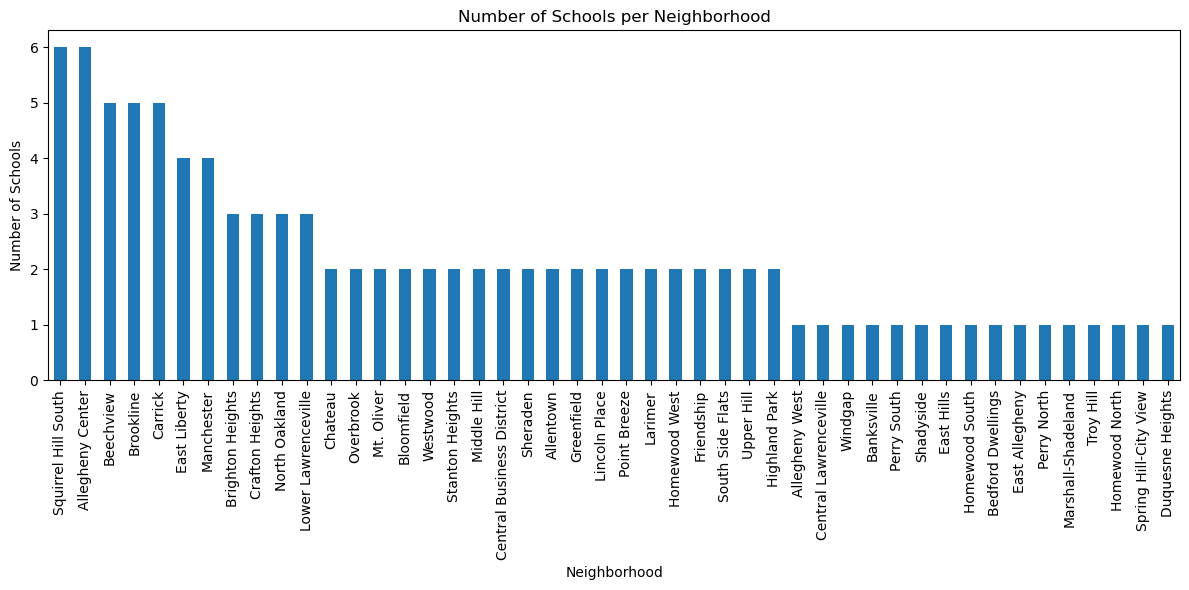

In [7]:
plt.figure(figsize=(12, 6))

school_counts_df.set_index('Neighborhood')['Number of Schools'] \
    .sort_values(ascending=False) \
    .plot(kind='bar')

plt.xlabel("Neighborhood")
plt.ylabel("Number of Schools")
plt.title("Number of Schools per Neighborhood")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


## Conclusion

Based on the analysis of public school distribution across Pittsburgh neighborhoods, **Squirrel Hill South** stands out as the neighborhood with the highest number of public schools. This concentration of educational resources suggests strong accessibility and support for families in the area, making Squirrel Hill South a leading neighborhood in terms of school availability.